In [48]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

## Initial Set up

In [49]:
def EOM(E,B,vi,q,m,steps,dt,vel=False):
    #start at 0 position with no acceleration
    r=np.array([0,0,0])
    a=[0,0,0]
    #Step counter
    i=0
    #Initial velocity
    v=vi
    #Where the results go
    res=[]
    while i<steps:
        #Compute acceleration at given time(more specifically velocity)
        a=(q/m)*(E+(np.cross(v,B)))
        #Add this to the current velocity, repeat for position
        v=v+a*dt
        r=r+v*dt
        #This is just recording time too, useful later
        t=i*dt
        #Record position and velocities at given time
        event=[r[0],r[1],r[2],t]
        velocities=[v[0],v[1],v[2],t]
        if vel==False:
            res.append(event)
        else:
            res.append(velocities)
        i+=1
        #Transpose needed for indexing correctly/easily
    return np.transpose(res)
    
    
    

In [50]:
ans=EOM([0,2,0],[0,0,1],[0,0,0],-1.60217663e-19,9.1093837e-31,1e+4,1e-14)
print(np.shape(ans))
print(ans[0])

(4, 10000)
[0.00000000e+00 6.18689563e-20 2.47475825e-19 ... 2.10986217e-10
 2.11000066e-10 2.11013881e-10]


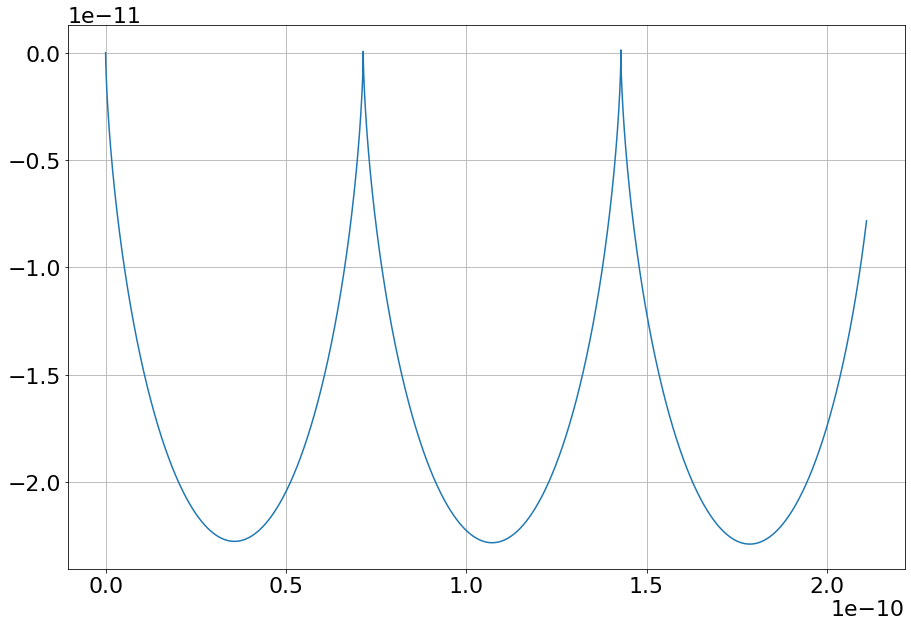

In [51]:
#Inverted from lab manual?
plt.plot(ans[0],ans[1])
plt.grid(True)
#plt.xlim(0,3e-10)

## Exercise 1

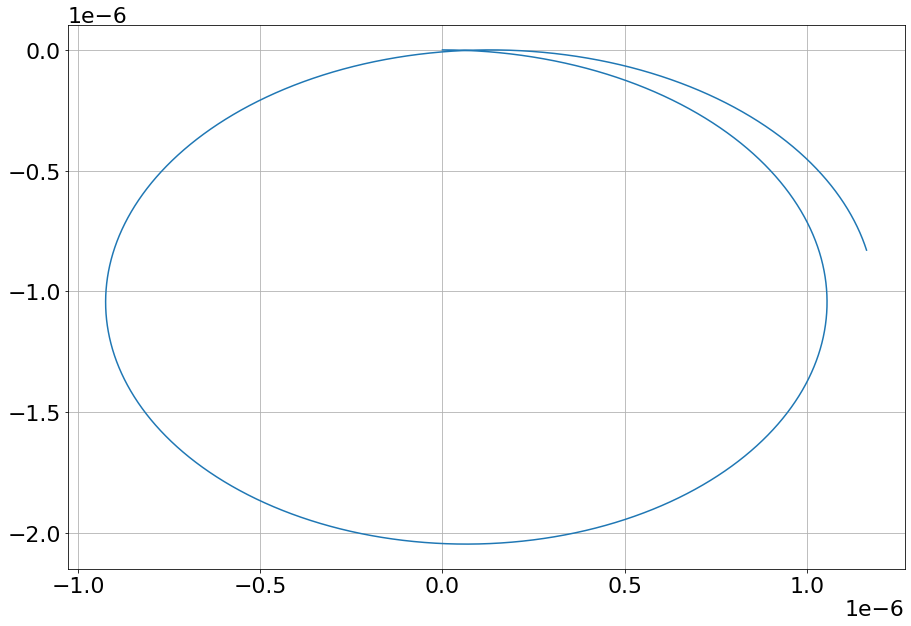

In [172]:
ans2=EOM([0,2,0],[0,0,1],[100,0,0],1.60217663e-19,1.67262192e-27,1e+6,8e-14)
plt.plot(ans2[0],ans2[1])
plt.grid(True)

## Exercise 2

Text(0.5, 0, 'Y')

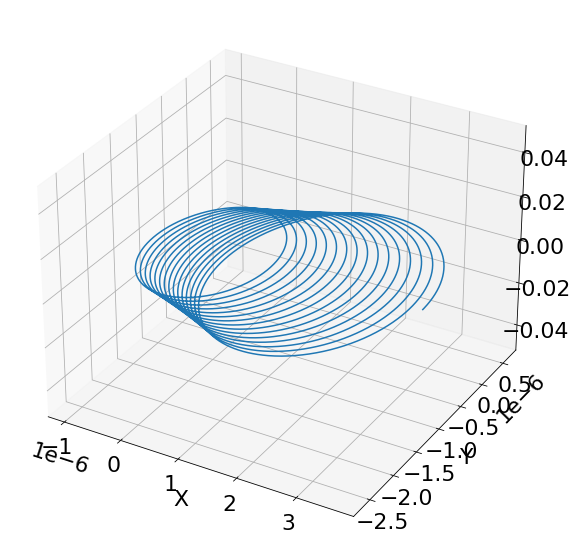

In [53]:
ans3=EOM([0,2,0],[0,0,1],[0,0,100],1.60217663e-19,1.67262192e-27,1e+4,1e-10)
ax3 = plt.figure().add_subplot(projection='3d')
ax3.plot(ans2[0],ans2[1],ans2[2])
plt.xlabel('X')
plt.ylabel('Y')

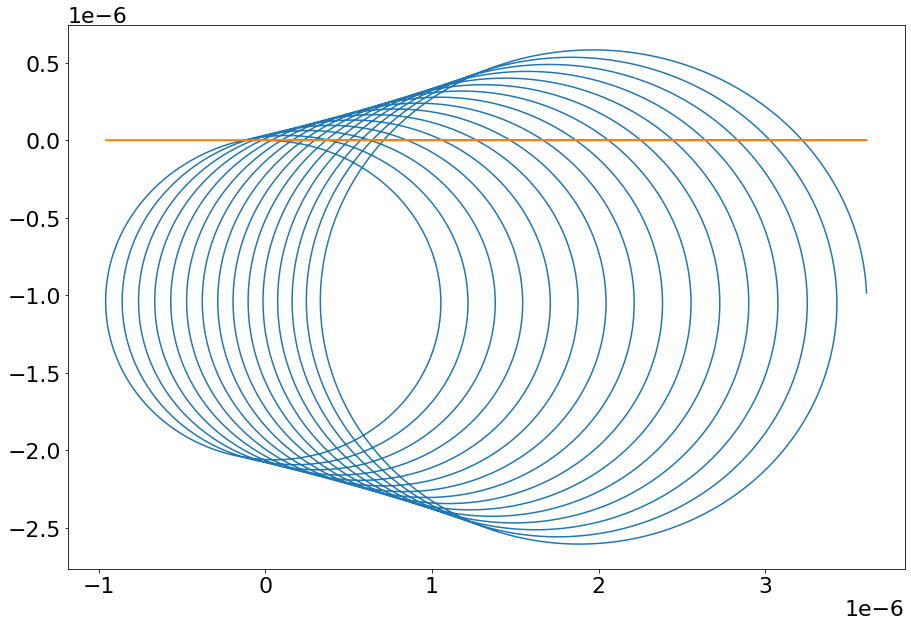

In [54]:
plt.plot(ans2[0],ans2[1])
plt.plot(ans2[0],ans2[2])

## Exercise 3

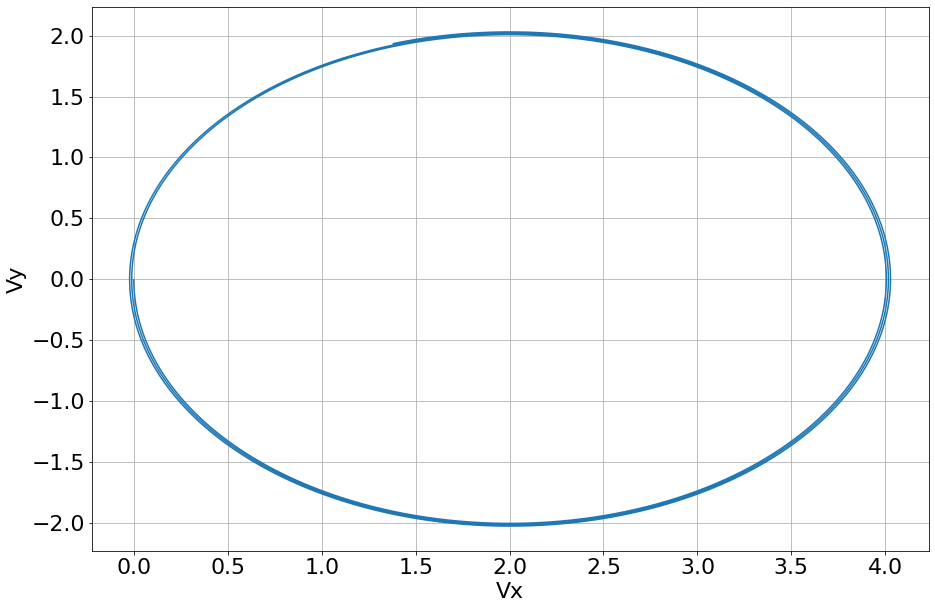

In [55]:
ans4=EOM([0,2,0],[0,0,1],[0,0,0],-1.60217663e-19,9.1093837e-31,1e+4,1e-14,vel=True)
plt.plot(ans4[0],ans4[1])
plt.xlabel('Vx')
plt.ylabel('Vy')
plt.grid(True)

## Exercise 4

In [70]:
def EOM2(E,B,vi,q,m,dt,vel=False):
    r=np.array([0,0,0])
    a=[0,0,0]
    T=2*np.pi*m/(np.absolute(q)*(B[0]**2+B[1]**2+B[2]**2)**(0.5))
    print(T)
    i=0
    v=vi
    res=[]
    t=0
    while t<=T:
        a=(q/m)*(E+(np.cross(v,B)))
        v=v+a*dt
        r=r+v*dt
        t=i*dt
        event=[r[0],r[1],r[2],t]
        velocities=[v[0],v[1],v[2],t]
        if vel==False:
            res.append(event)
        else:
            res.append(velocities)
        i+=1
    return np.transpose(res)

3.572386761208795e-11


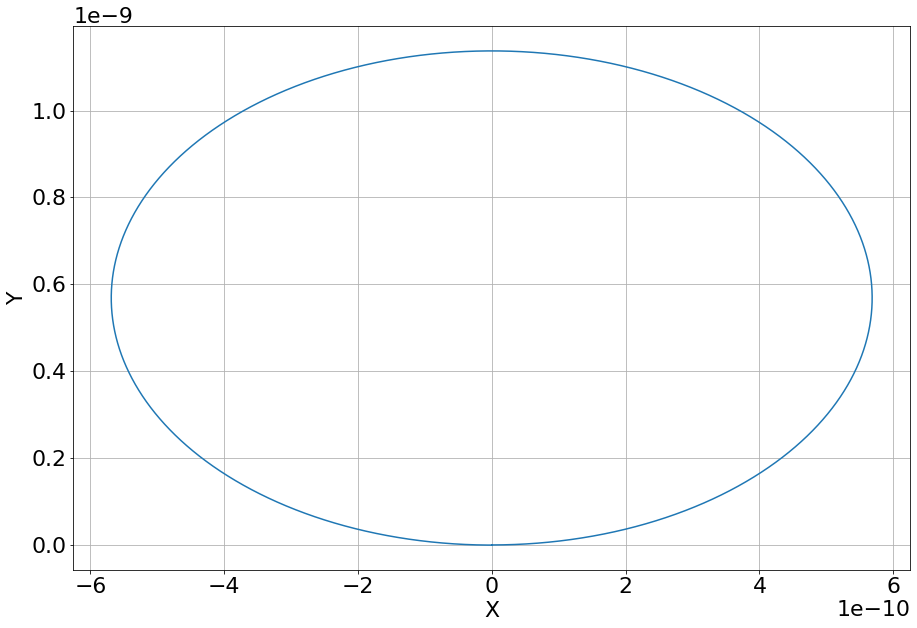

In [87]:
#Unsure what the starting conds are since if the velocity is left in the z direction
#there is no fields as cross product is zero
#Presume its asking for position?

ans5=EOM2([0,0,0],[0,0,1],[100,0,0],-1.60217663e-19,9.1093837e-31,1e-15,vel=False)
plt.plot(ans5[0],ans5[1])
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

## Exercise 5

In [100]:
def Bfunc(r):
    return [0,0,np.absolute(r[0])*1e+11]
def EOM3(E,vi,q,m,steps,dt,vel=False):
    #start at 0 position with no acceleration
    r=np.array([0,0,0])
    a=[0,0,0]
    #Step counter
    i=0
    #Initial velocity
    v=vi
    #Where the results go
    res=[]
    while i<steps:
        B=Bfunc(r)
        #Compute acceleration at given time(more specifically velocity)
        a=(q/m)*(E+(np.cross(v,B)))
        #Add this to the current velocity, repeat for position
        v=v+a*dt
        r=r+v*dt
        #This is just recording time too, useful later
        t=i*dt
        #Record position and velocities at given time
        event=[r[0],r[1],r[2],t]
        velocities=[v[0],v[1],v[2],t]
        if vel==False:
            res.append(event)
        else:
            res.append(velocities)
        i+=1
        #Transpose needed for indexing correctly/easily
    return np.transpose(res)


(4, 100000)


Text(0, 0.5, 'V_y')

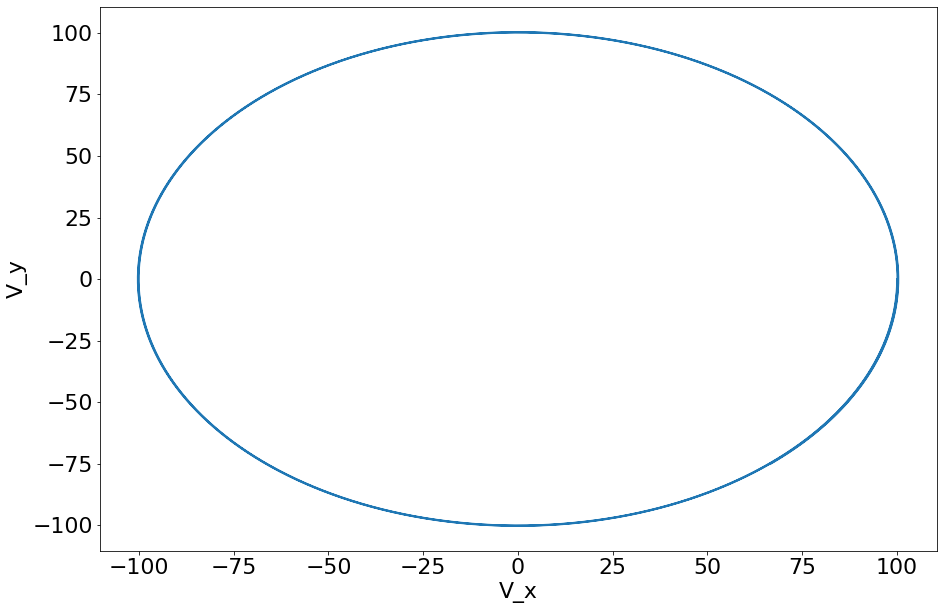

In [149]:
ans6=EOM3([0,2,0],[100,0,0],1.60217663e-19,1.67262192e-27,1e+5,1e-14,vel=True)
print(np.shape(ans6))
plt.plot(ans6[0],ans6[1])
plt.xlabel('V_x')
plt.ylabel('V_y')



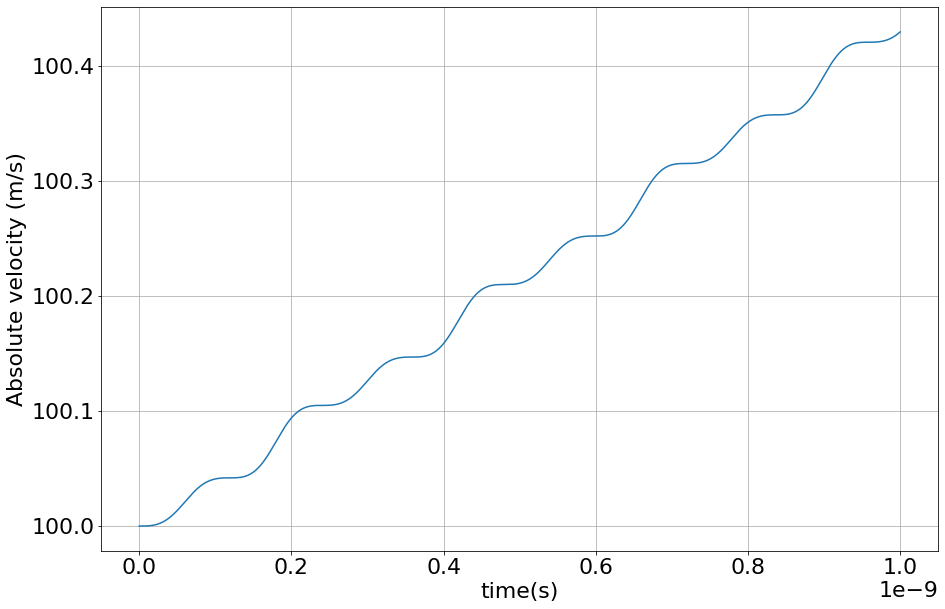

In [150]:
#Just thought this was interesting from the data obtained
plt.plot(ans6[3],(ans6[0]**2+ans6[1]**2+ans6[2]**2)**(0.5))
plt.xlabel('time(s)')
plt.ylabel('Absolute velocity (m/s)')
plt.grid(True)



Text(0, 0.5, 'Y')

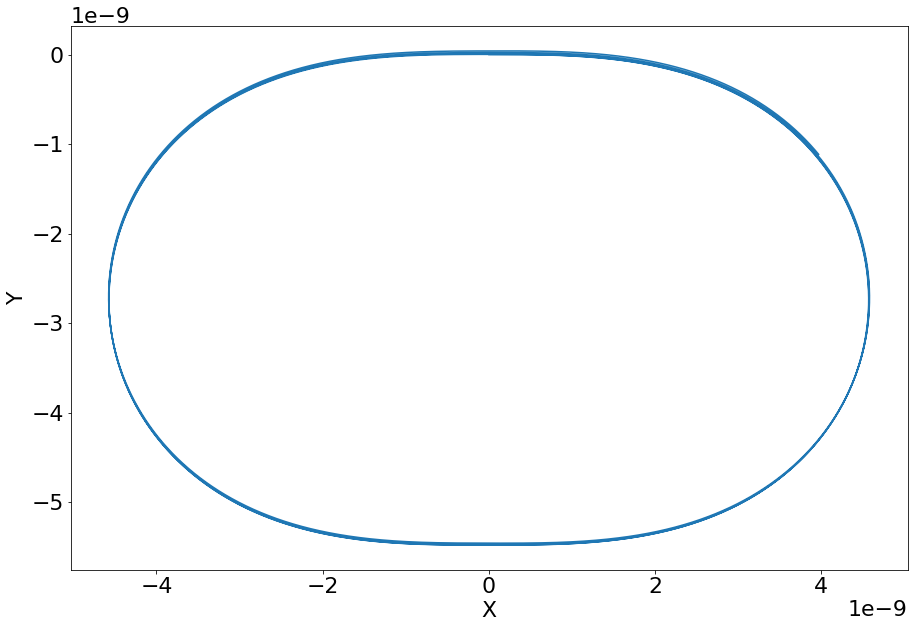

In [151]:
ans7=EOM3([0,2,0],[100,0,0],1.60217663e-19,1.67262192e-27,1e+5,1e-14,vel=False)
plt.plot(ans7[0],ans7[1])
plt.xlabel('X')
plt.ylabel('Y')

## Exercise 6.1

6.5594474887644e-08


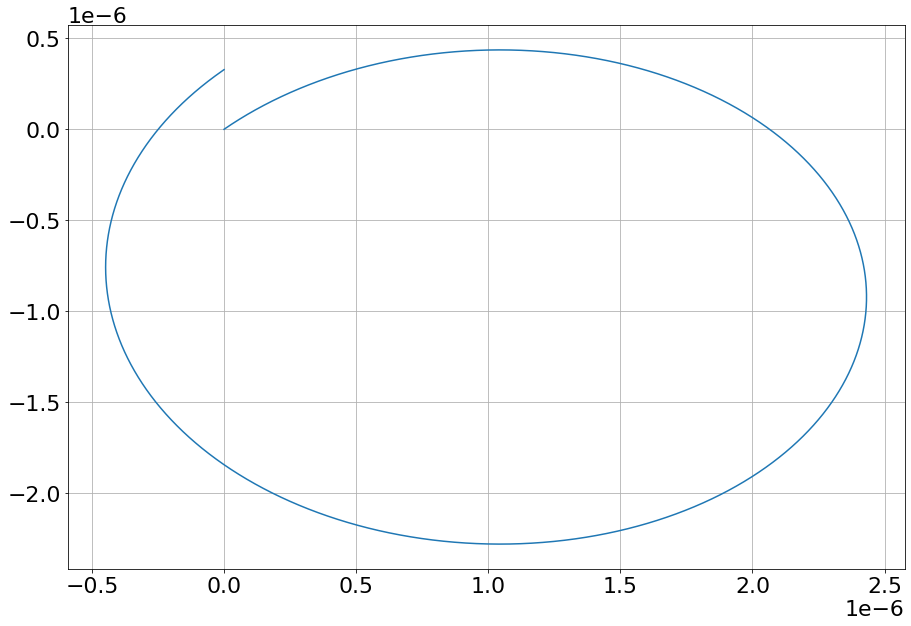

In [176]:
ans8=EOM2([-5,0,0],[0,0,1],[100,100,0],1.60217663e-19,1.67262192e-27,1e-13)
plt.plot(ans8[0],ans8[1])
plt.grid(True)

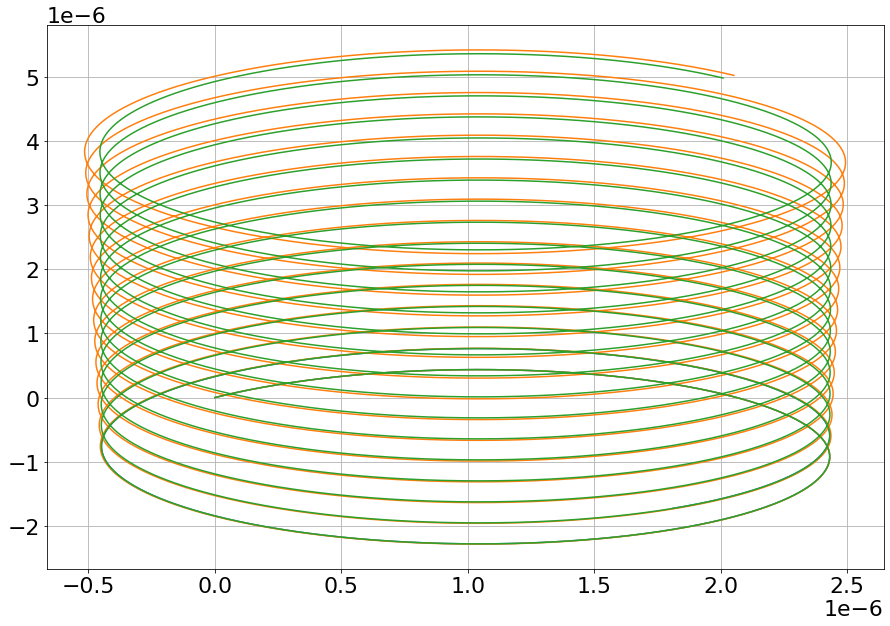

In [196]:
ans9=EOM([-5,0,0],[0,0,1],[100,100,0],1.60217663e-19,1.67262192e-27,1e+6,1e-13)
ans10=EOM([-5,0,0],[0,0,1],[100,100,0],1.60217663e-19,1.67262192e-27,1e+5,1e-11)
ans11=EOM([-5,0,0],[0,0,1],[100,100,0],1.60217663e-19,1.67262192e-27,1e+6,1e-12)

plt.plot(ans9[0],ans9[1])
plt.plot(ans10[0],ans10[1])
plt.plot(ans11[0],ans11[1])

plt.grid(True)
#Function does not appear to be well behaved with E-C method

## Exercise 6.2:

Text(0.5, 0, 'Y')

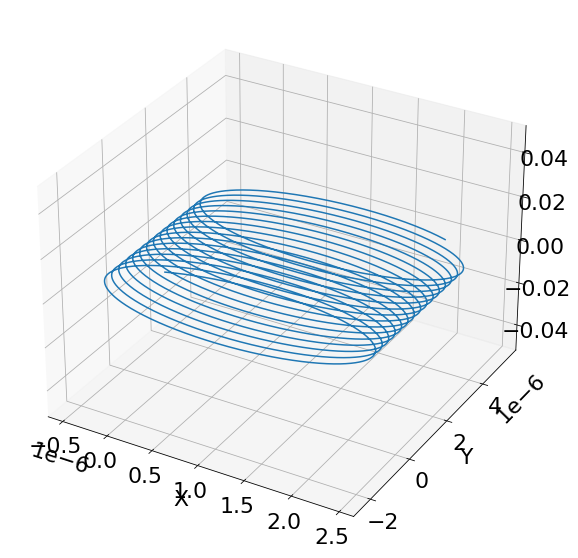

In [199]:
ax4 = plt.figure().add_subplot(projection='3d')
ax4.plot(ans11[0],ans11[1],ans11[2])
plt.xlabel('X')
plt.ylabel('Y')

In [ ]:
plt.plot()